In [269]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

csv_path = "school_grades_dataset.csv"
grades_table = pd.read_csv(csv_path)
grades_table = grades_table.drop(columns=["G1", "G2", "failures"])

In [270]:
train_set, test_set = train_test_split(grades_table, test_size=0.2, random_state=42)

features_train = train_set.drop("G3", axis=1)
grades_label_train = train_set["G3"].copy()

In [271]:
features_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
332,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,yes,yes,no,4,3,3,1,2,2,0
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,yes,yes,yes,4,4,5,5,5,5,4
302,GP,M,18,R,GT3,T,3,2,other,other,...,yes,no,no,5,3,2,1,1,3,2
286,GP,M,17,R,GT3,T,2,1,other,other,...,yes,yes,no,4,4,2,2,4,5,0
554,MS,F,17,R,GT3,T,1,1,at_home,at_home,...,no,yes,yes,3,5,5,2,2,4,3


In [298]:
features_train.describe()

count    519.000000
mean      11.793834
std        3.247494
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [299]:
grades_label_train.describe()




count    519.000000
mean      11.793834
std        3.247494
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [274]:
corr_matrix = grades_table.corr()
corr_matrix["G3"].sort_values(ascending=False)

G3            1.000000
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
Name: G3, dtype: float64

In [275]:
# train_set.plot(kind="scatter", x="studytime", y="G3")

In [276]:
numerical_attr = []
categorical_attr = []
for type, column in zip(features_train.dtypes, features_train):
    if type == pd.CategoricalDtype :
        categorical_attr.append(column)
    else:
        numerical_attr.append(column)
print(numerical_attr)
print(categorical_attr)
    

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [277]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
full_pipeline = ColumnTransformer([
    ("num", numeric_pipeline, numerical_attr),
    ("cat", OneHotEncoder(), categorical_attr),
])
train_set_prepared = full_pipeline.fit_transform(features_train)


# corr_matrix = train_set_prepared.corr()
# corr_matrix["G3"].sort_values(ascending=False)

In [278]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# lin_reg = LinearRegression()
# I chose the RIDGE because the params of the lin reg was huge!!!
# In order of 10^13
lin_reg = Ridge()
print(grades_label_train)
print(train_set_prepared[0])

lin_reg.fit(train_set_prepared, grades_label_train)

332    18
29     12
302    12
286    13
554    10
       ..
71     10
106    10
270    15
435    10
102    12
Name: G3, Length: 519, dtype: int64
[ 0.98793212 -0.43741772 -0.25633653 -0.7543101   1.35296158  0.06813614
 -0.18668    -0.19627032 -0.53967404 -0.21994878 -1.06834489 -0.78961576
  1.          0.          1.          0.          0.          1.
  1.          0.          0.          1.          1.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          1.          0.          1.          0.          0.
  1.          1.          0.          1.          0.          0.
  1.          0.          1.          0.          1.          1.
  0.        ]


Ridge()

In [279]:
some_data = features_train.iloc[:5]
some_labels = grades_label_train.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [14.06316908 11.08063759 13.09865294 11.32249231  8.06532248]
Labels: [18, 12, 12, 13, 10]


In [280]:
from sklearn.metrics import mean_squared_error
grades_predictions = lin_reg.predict(train_set_prepared)
lin_mse = mean_squared_error(grades_label_train, grades_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.645544040031268

In [281]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

lin_scores = cross_val_score(lin_reg, train_set_prepared, grades_label_train,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.14648537 2.44332818 3.35529681 2.95020082 3.48168492 2.5071867
 3.05601058 2.44590911 2.61987348 2.36132053]
Mean: 2.8367296508397226
Standard deviation: 0.39127126582439653


In [288]:
X_test = test_set.drop("G3", axis=1)
y_test = test_set["G3"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = lin_reg.predict(X_test_prepared)

print(list(y_test[0:10]))
print(final_predictions[0:10])
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
print(final_rmse)

[19, 12, 18, 11, 11, 17, 18, 8, 10, 11]
[13.04080853 12.60598531 14.0357477  11.96087701 10.53499056 12.9963805
 14.03178983 10.3639171  12.37430495 11.67072131]
2.9242490307188427


(array([52., 37., 20., 13.,  5.,  0.,  1.,  1.,  0.,  1.]),
 array([ 0.01518039,  1.3067462 ,  2.59831202,  3.88987783,  5.18144365,
         6.47300946,  7.76457528,  9.05614109, 10.3477069 , 11.63927272,
        12.93083853]),
 <BarContainer object of 10 artists>)

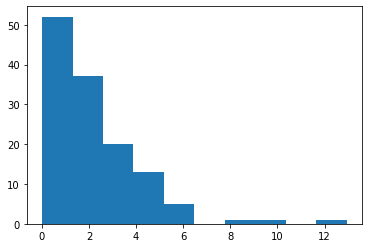

In [301]:
dist = [abs(a-b) for a,b in zip(final_predictions, y_test)]
plt.hist(dist)

In [283]:
"""
The mse of the test is around 2.92.
While predicting the students grade :)
The students grade are between 0 to 19.
The graph above is the distances between the predictions and the results. 
It looks pretty good

"""

In [303]:
#Some of this coefficents are pretty huge
lin_reg.coef_

array([-0.10580727,  0.00876401,  0.31118134, -0.04233887,  0.37651873,
        0.19775944, -0.20606098, -0.12101331, -0.2621406 , -0.0229904 ,
       -0.34233327, -0.28729845,  0.75897353, -0.75897353,  0.29404926,
       -0.29404926, -0.11122489,  0.11122489, -0.15690727,  0.15690727,
        0.02699887, -0.02699887, -0.34493595,  0.33813599, -0.19621634,
       -0.03256344,  0.23557974,  0.64894022, -0.41545437,  0.13144922,
       -0.52457361,  0.15963854, -0.01393261,  0.08407649, -0.5601594 ,
        0.49001553,  0.13929703, -0.23238453,  0.0930875 ,  0.85549265,
       -0.85549265,  0.05052393, -0.05052393,  0.34779816, -0.34779816,
       -0.05673493,  0.05673493,  0.01541144, -0.01541144, -1.00634985,
        1.00634985, -0.27492928,  0.27492928,  0.17722762, -0.17722762])